In [1]:
from tqdm.auto import tqdm
from policy_runner import define_actions, define_policies, run_policies
import matplotlib.pyplot as plt
import numpy as np

#### Exemplary set of actions

In [2]:
actions = define_actions(10)

for action in actions:
    print(f"Action {action.name}: average reward = {action.average_reward}")

Action 1: average reward = -0.05189525216427247
Action 2: average reward = -0.3918456580068309
Action 3: average reward = -0.4080899154057188
Action 4: average reward = -0.6146005009836161
Action 5: average reward = -0.9617984942763909
Action 6: average reward = -1.0938449041959386
Action 7: average reward = -1.619745286114669
Action 8: average reward = -0.6729171500204331
Action 9: average reward = 0.04445724175804644
Action 10: average reward = -0.6705420583513396


#### Defining and running policies

In [3]:
policies = define_policies(actions)
run_policies(policies, 4)

{'greedy r$_0$=0': array([-2.54505335,  0.22078607,  0.30788095, -1.18465696]),
 'greedy r$_0$=5': array([-0.51525807,  0.15339385,  2.8788333 , -1.15802331]),
 'epsilon-greedy $\\epsilon$=0.1': array([-0.66478162,  1.75888258, -0.96993769, -2.4562087 ]),
 'epsilon-greedy $\\epsilon$=0.01': array([-0.83333097, -0.43945537,  0.58166944,  0.80717161]),
 'UCB c=2': array([-0.85890668,  0.26707077,  0.6351764 , -1.63628906])}

## Evaluation of policies

Helper function to average results from policy runs in an incremental way

In [4]:
def average_runs(prev, new, idx):
    if prev is None:
        return new

    assert set(prev.keys()) == set(new.keys())
    for name, old_res in prev.items():
        prev[name] = old_res + (new[name] - old_res) / idx

    return prev


### Setup and execution of the experiment

In [5]:
POLICY_RUN_STEPS = 1000
REPEAT = 2000

combined_results = None

for i in tqdm(range(REPEAT), desc="Evaluation iteration"):
    actions = define_actions(10)
    policies = define_policies(actions)
    new_results = run_policies(policies, POLICY_RUN_STEPS)
    combined_results = average_runs(combined_results, new_results, i)


Evaluation iteration:   0%|          | 0/2000 [00:00<?, ?it/s]

### Results

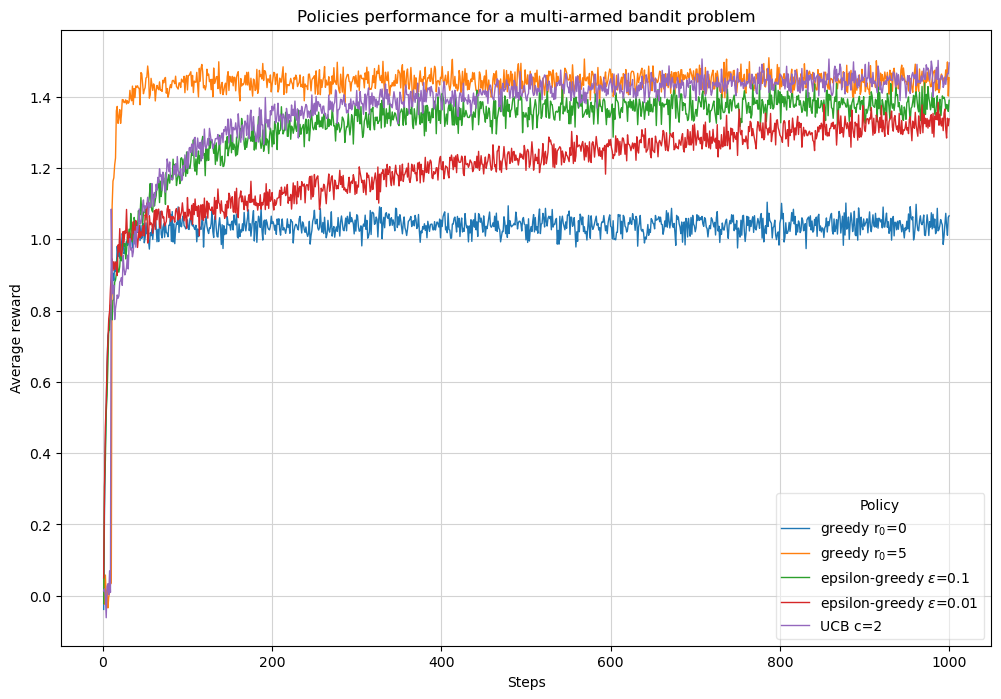

In [6]:
def plot_results(results):
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.grid(color='lightgrey')
    x = np.arange(len(next(iter(results.values())))) + 1
    for policy_name, policy_result in results.items():
        ax.plot(x, policy_result, label=policy_name, lw=1)
    ax.legend(title="Policy", fancybox=True, framealpha=0.5)
    ax.set_ylabel("Average reward")
    ax.set_xlabel("Steps")
    _ = ax.set_title("Policies performance for a multi-armed bandit problem")

plot_results(combined_results)

#### Results - zoom at the initial steps

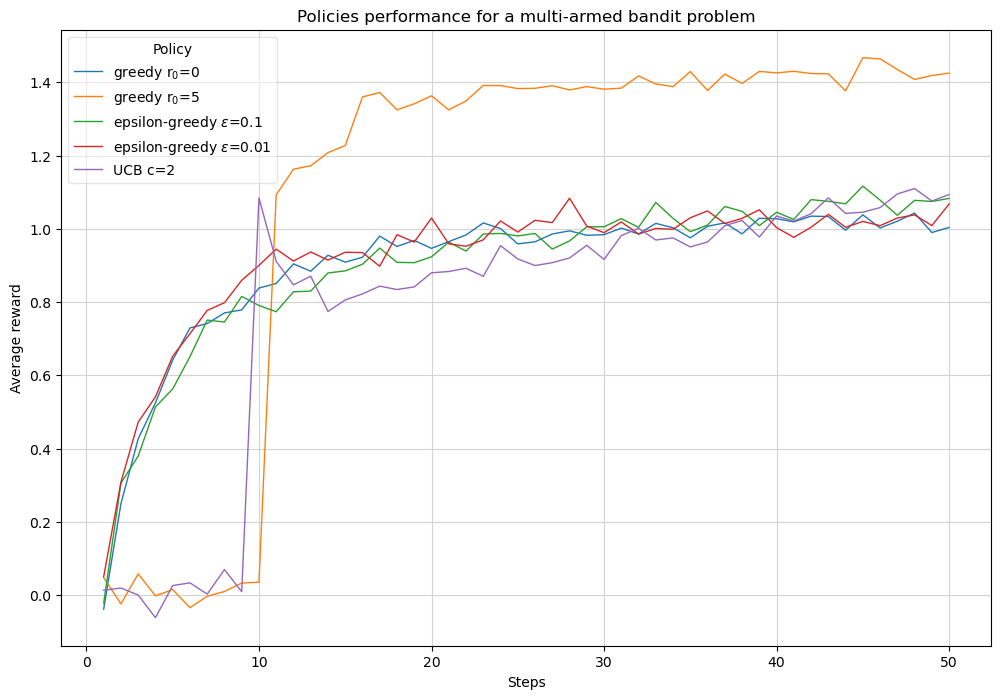

In [7]:
results_trimmed = {key: value[:50] for key, value in combined_results.items()}
plot_results(results_trimmed)